In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [104]:
# 读取CSV文件
df = pd.read_csv('fdcl/fdcljc.csv')  # 替换为你的CSV文件路径

# 将日期和时间列合并为一个datetime类型的列
df['日期时间'] = pd.to_datetime(df['日期'].astype(str) + ' ' + df['时间'])

df.head()

,日期,时间,发电类型,发电出力值,负荷率,受阻率,厂用率,日期时间
0,20231028,15:30,光伏,1063.2375,0.0,0.0,0.8523,2023-10-28 15:30:00
1,20231028,15:30,火电燃煤,11417.4727,0.0,0.0,10.0141,2023-10-28 15:30:00
2,20231028,15:30,水电有功,460.5616,0.0,0.0,1.0456,2023-10-28 15:30:00
3,20231028,15:30,发电有功,15180.0322,0.0,0.0,0.0000,2023-10-28 15:30:00
4,20231028,15:30,风电,878.1815,0.0,0.0,6.0089,2023-10-28 15:30:00


In [188]:
df_fdyg = df[df['发电类型'] == '发电有功']

df_gf = df[df['发电类型'] == '光伏']
df_hdrm = df[df['发电类型'] == '火电燃煤']
df_sdyg = df[df['发电类型'] == '水电有功']
df_fd = df[df['发电类型'] == '风电']

df_hdswz = df[df['发电类型'] == '火电生物质']

In [200]:
# 将每个数据集保存到单独的CSV文件中
df_fdyg.to_csv('fdcl/split/df_fdyg.csv', index=False)
df_gf.to_csv('fdcl/split/df_gf.csv', index=False)
df_hdrm.to_csv('fdcl/split/df_hdrm.csv', index=False)
df_sdyg.to_csv('fdcl/split/df_sdyg.csv', index=False)
df_fd.to_csv('fdcl/split/df_fd.csv', index=False)
df_hdswz.to_csv('fdcl/split/df_hdswz.csv', index=False)


In [212]:
# 预览数据集
dfshow = df_hdrm[2000:]
dfshow

,日期,时间,发电类型,发电出力值,负荷率,受阻率,厂用率,日期时间
11924,20231118,20:15,火电燃煤,8179.5938,44.6729,55.82,13.3934,2023-11-18 20:15:00
11931,20231118,20:30,火电燃煤,8188.7876,44.6539,55.84,13.4284,2023-11-18 20:30:00
11939,20231118,20:45,火电燃煤,8230.8516,44.8119,55.55,13.2407,2023-11-18 20:45:00
11942,20231118,21:00,火电燃煤,8267.9980,45.0615,55.20,13.3069,2023-11-18 21:00:00
11949,20231118,21:15,火电燃煤,8256.3779,44.9411,55.33,13.2404,2023-11-18 21:15:00
...,...,...,...,...,...,...,...,...
38003,20240103,07:30,火电燃煤,13431.2119,64.1552,52.77,10.8924,2024-01-03 07:30:00
38008,20240103,07:45,火电燃煤,13455.7705,64.4595,52.51,10.8386,2024-01-03 07:45:00
38016,20240103,08:00,火电燃煤,13476.9434,63.7604,52.75,10.7667,2024-01-03 08:00:00
38018,20240103,08:15,火电燃煤,13570.9307,64.0786,52.53,10.7311,2024-01-03 08:15:00


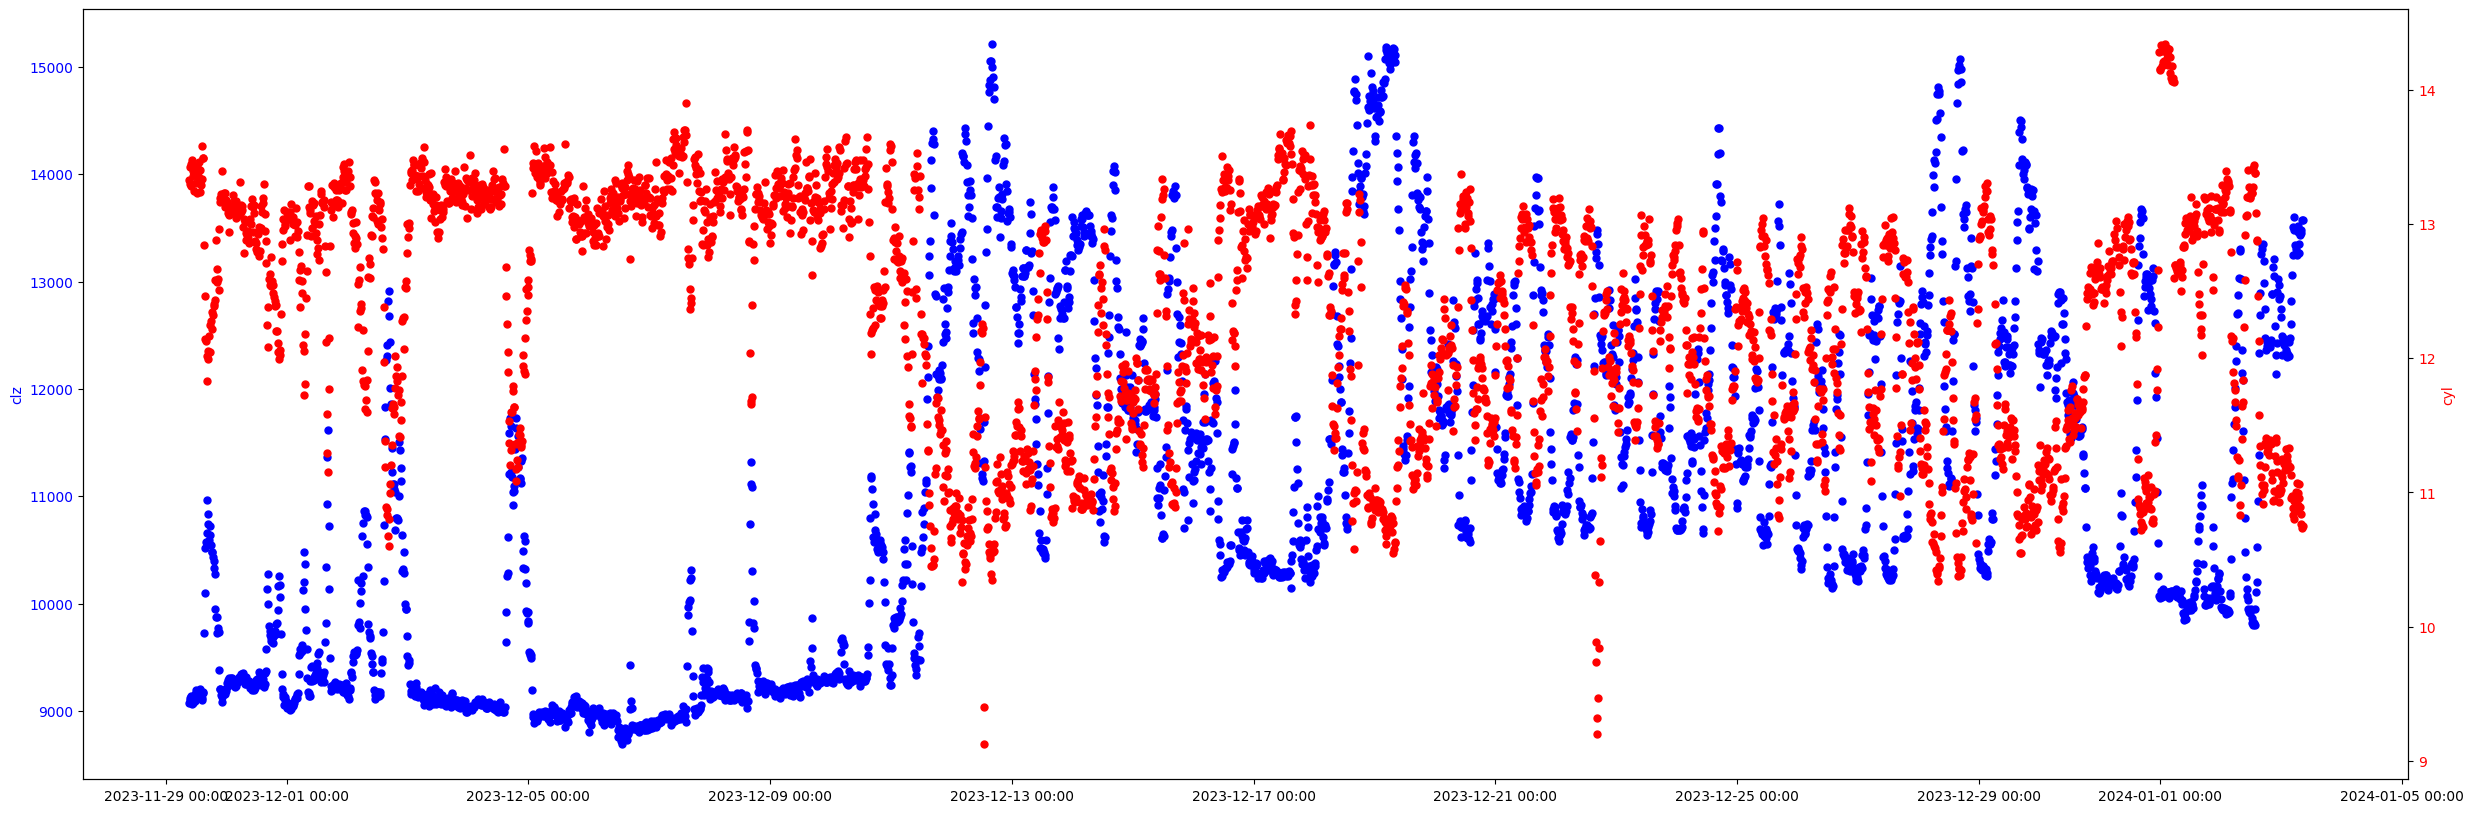

In [210]:
# 绘图
fig, ax1 = plt.subplots(figsize=(30, 10))
# 绘制发电出力值的散点图
ax1.scatter(dfshow['日期时间'], dfshow['发电出力值'], color='blue', label='clz', s=25)
ax1.set_ylabel('clz', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# 创建第二个y轴
ax2 = ax1.twinx()  
ax2.scatter(dfshow['日期时间'], dfshow['厂用率'], color='red', label='cyl', s=25)
# 设置第二个y轴的标签
ax2.set_ylabel('cyl', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 设置x轴时间标签纵向显示
plt.xticks(rotation=90)
# 设置x轴日期格式，只显示日期到小时
date_form = DateFormatter('%Y-%m-%d %H:%M')
ax1.xaxis.set_major_formatter(date_form)

# 显示图表
plt.show()

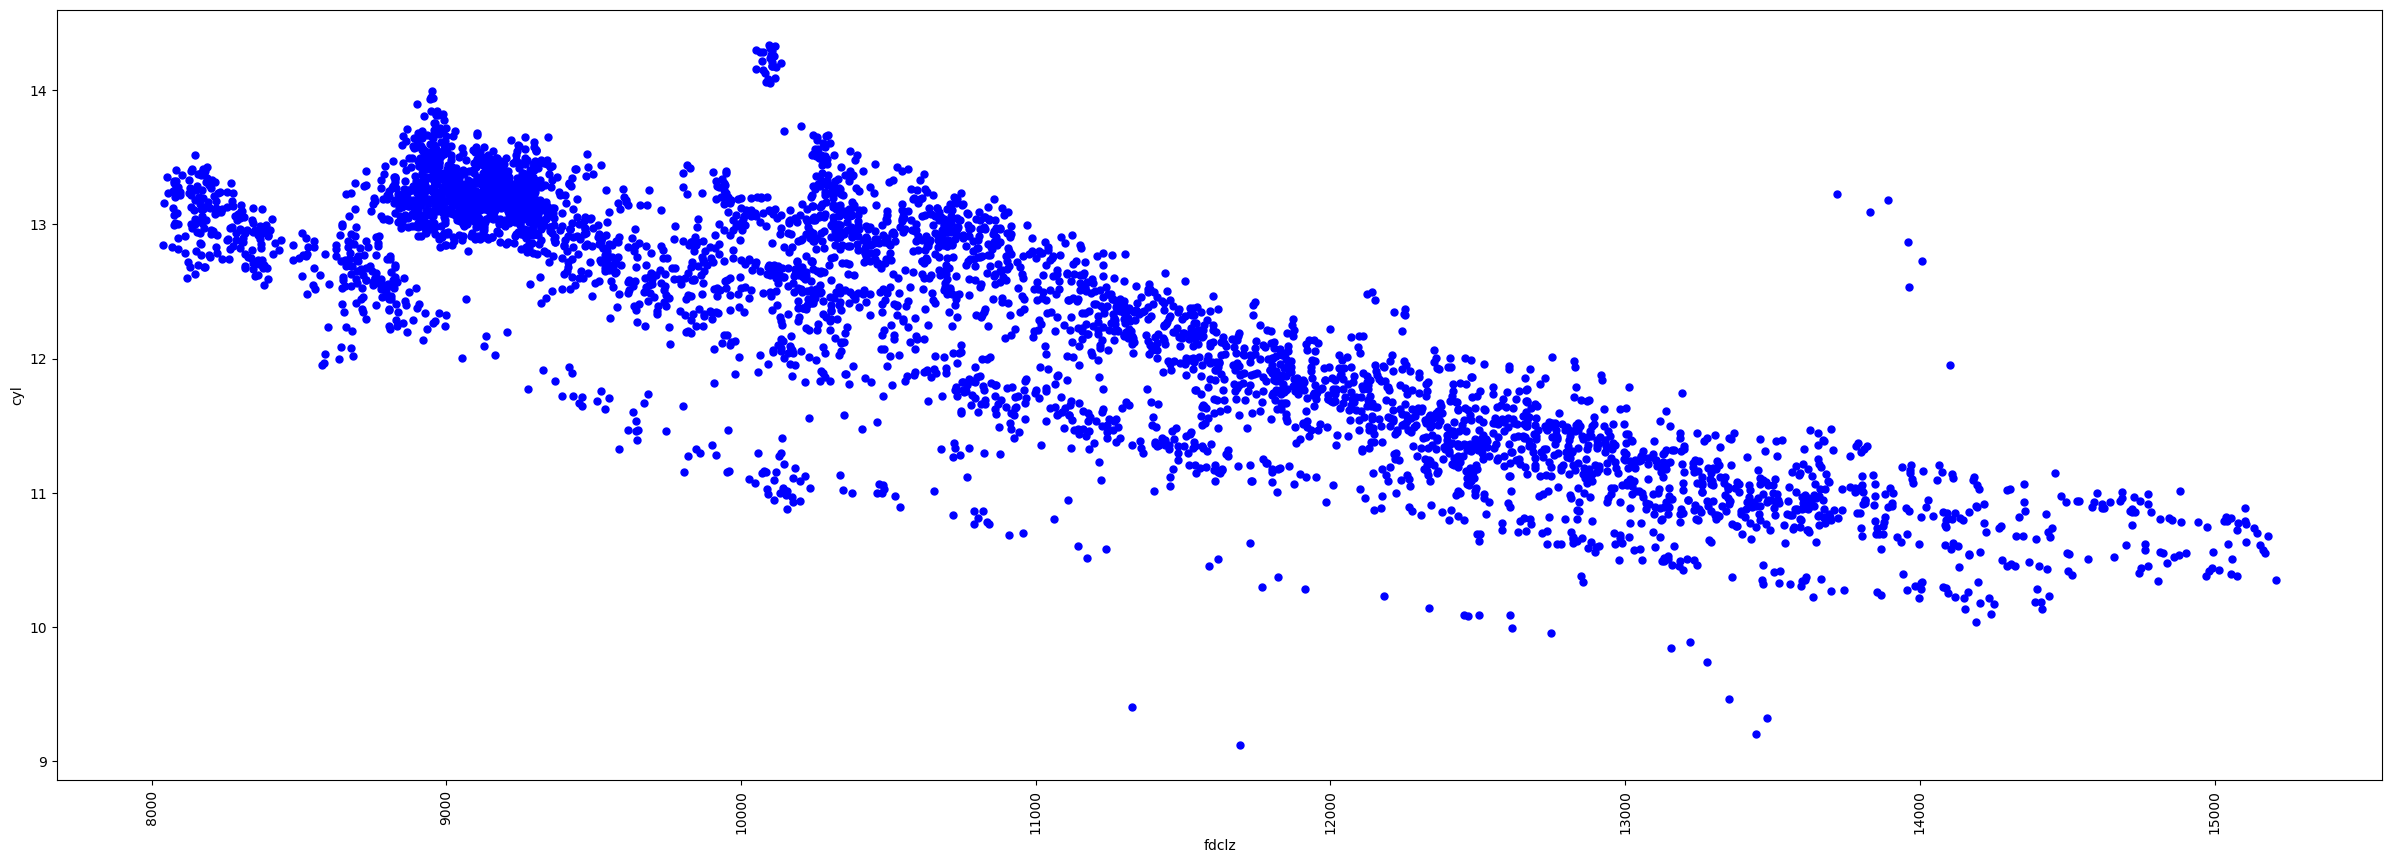

In [213]:
# 绘图
fig, ax1 = plt.subplots(figsize=(30, 10))

# 绘制发电出力值的散点图
ax1.scatter(dfshow['发电出力值'],dfshow['厂用率'], color='blue', label='fdcl', s=25)
ax1.set_ylabel('cyl')
ax1.set_xlabel('fdclz')
ax1.tick_params(axis='y')

# 设置x轴时间标签纵向显示
plt.xticks(rotation=90)

# 显示图表
plt.show()
